# Conceptual Test

purpose: classify PSK and GFSK signals

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()
from lib import sig_gen

Loading BokehJS ...

In [19]:
sig = sig_gen.gfsk_gen(bt=0.5, mi=0.5, sps=50)
phase = np.diff(np.unwrap(np.angle(sig)))
fig = figure(plot_width=600, plot_height=300)
fig.line(np.arange(phase.size), phase/np.pi)
show(fig)

In [88]:
bt, span, sps, mi = 0.02, 5, 50, 0.5
gaus = sig_gen.gaussdesign(bt, span, sps*2)
gaus = gaus[:-1]*sps
msg = np.random.randint(0, 2, 32)
msg = np.array([0,1,0,1,0,1,0,1,1, 1, 1])
freq = msg*2-1.0
freq = sig_gen.upsample(freq, sps)
freq_gaus = np.convolve(freq, gaus)

phase = np.zeros_like(freq_gaus)
for idx in range(freq_gaus.size-1):
    phase[idx+1] = phase[idx] + np.pi/sps*mi*freq_gaus[idx]
# sig = np.exp(1j*phase)
# return sig[int(sps*span/2):int(-sps*span/2)]

# fig1 = figure(plot_width=600, plot_height=300)
# fig1.line(np.arange(freq.size), freq)
# show(fig1)

fig2 = figure(plot_width=600, plot_height=300)
fig2.line(np.arange(gaus.size), gaus)
show(fig2)

freq_gaus = np.diff(phase)
fig4 = figure(plot_width=600, plot_height=300)
fig4.line(np.arange(freq_gaus.size), freq_gaus)
show(fig4)
# 

fig3 = figure(plot_width=600, plot_height=300)
fig3.line(np.arange(phase.size), phase/np.pi)
show(fig3)

In [83]:
gaus.size

50

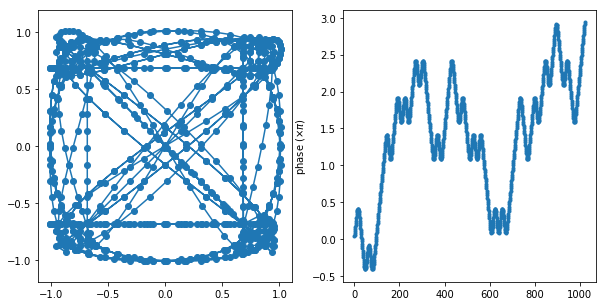

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sig = sig_gen.psk_gen()
ax[0].plot(sig.imag, sig.real, marker='o')
ax[0].axis('equal')

sig = sig_gen.gfsk_gen()
phase = np.unwrap(np.angle(sig))
ax[1].plot(phase/np.pi, marker='.')
plt.ylabel('phase ('r'$\times \pi$)')
plt.show()   

In [37]:
%timeit np.array([sig_gen.gfsk_gen() for x in range(10)])

4.59 ms ± 48.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [32]:
sig2 = np.vstack((sig, sig, sig))
sig2 = np.expand_dims(sig2, 1)[:, :, 0:-1: 4]

# sig2 = np.matlib.repmat(sig, 3, 1)
sig2.shape


(3, 1, 256)